[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mishagrol/ml_course/blob/master/Yandex_MPTI/Week_4/Week4_CLT.ipynb)


# Центральная предельная теорема


Привет! Меня зовут Михаил и это мой `notebook` для 4 недели курса `Математика и Python для анализа данных`

Код написан на языке `Python 3`, вы также можете его запустить в Google Colab (кнопка сверху)

Если у вас возникли вопросы или что-то работает не правильно, пишите мне в  Телеграм @misha_grol

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm

## Beta distribution

>In probability theory and statistics, the beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parametrized by two positive shape parameters, denoted by α and β, that appear as exponents of the random variable and control the shape of the distribution. The generalization to multiple variables is called a Dirichlet distribution.
The beta distribution has been applied to model the behavior of random variables limited to intervals of finite length in a wide variety of disciplines. 
>
> -- <cite>Wikipedia</cite>

https://en.wikipedia.org/wiki/Beta_distribution

In [3]:
from scipy.stats import beta

### Probability Density Function of Beta Distribution

$$\frac{x^{\alpha-1}(1-x)^{\beta-1}}{\mathrm{B}(\alpha, \beta)}$$

In [4]:
a, b = 2.31, 0.627

mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

### Значения функции плотности вероятности могут принимать различные формы в зависимости от параметров $a$ и $b$

parameters a:0.5, b:0.5
parameters a:5.0, b:1.0
parameters a:1.0, b:3.0
parameters a:2.0, b:2.0
parameters a:2.0, b:5.0


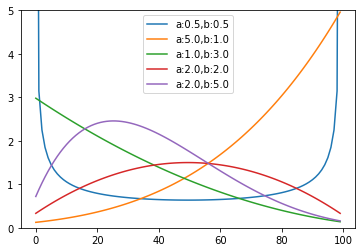

In [5]:
parameters = np.array([[0.5, 0.5],
    [5,1],
    [1,3],
    [2,2],
    [2,5]])



fig, ax = plt.subplots(1,1)
for i in range(len(parameters)):
    a = parameters[i,0]
    b = parameters[i,1]
    print(f'parameters a:{a}, b:{b}')
    ax.plot(beta.pdf((np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)) , a , b), label = f'a:{a},b:{b}')
ax.legend()
plt.gca().set_ylim(0.0, 5.0)
plt.show()

#### Как видно на графике распределения могут иметь различную форму в зависимости от параметров $a$ и $b $


Найдем теоритические значения среднего($E[X]$) и дисперсии($Var[X]$) [Wiki](https://en.wikipedia.org/wiki/Beta_distribution)

$$ E[X] = \frac{\alpha}{\alpha + \beta}$$
$$\operatorname{var}[X]=\frac{\alpha \beta}{(\alpha+\beta)^{2}(\alpha+\beta+1)}$$

In [6]:
#Для примера возьмем параметры a=0.9 и beta=0.7, вы можете указать те которые вам больше нравятся! 

a = 0.9
b = 0.7

#Посчитаем теоритическое среднее и диспрерсию, 


mu = a/(a+b) # Среднее 

theor_variance = (a*b)/((a+b)**2)*(a+b+1) # Дисперсия
sigma = np.sqrt(theor_variance) # Стандартное отклонение это корень из дисперсии 

print(f'mu:{mu}, var:{theor_variance}')


mu:0.5625, var:0.6398437499999998


## Графики и результаты

Для трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.

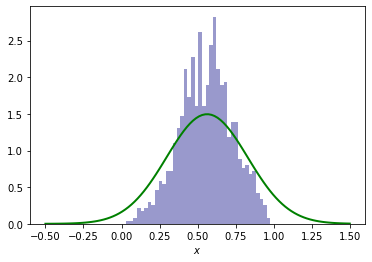

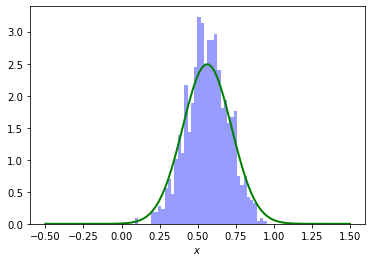

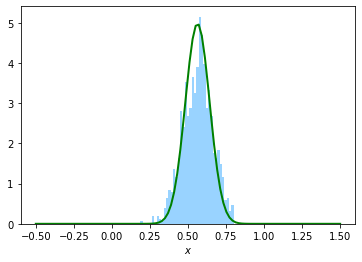

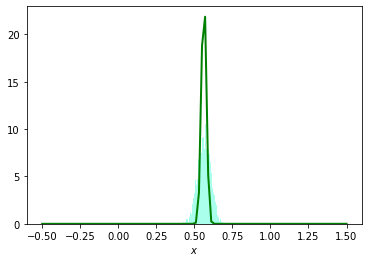

In [41]:
## создаем список со значениями размеров выборки 
sizes_of_n = [3,5,10,50]

##### Немного хитрости для того что бы графики в цикле были разного цвета
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,0.4,len(sizes_of_n))))


#Функция selected_beta будет считать выборочное среднее размера n c параметрами распределения a и b

def selected_beta(n, a, b):
    n_array = np.zeros([1000,n]) # сделаем пустую матрицу размера 1000 на n 
    for i in range(1000):
        n_array[i,:] = beta.rvs(a,b,size=n) # в цикле будем добавлять на каждом шаге (то есть в каждую строку)
                                             # n случайных значений из нашего распределения
    # теперь посчитаем среднее для каждой строки и вернет вектор размера 1000
    result = np.sum(n_array, axis=1)/n 
    return result

#Мы сделали функцию для расчета выбочрного среднего из бета распределения, теп



# В цикле для всех значений n построим гистограммы полученных выборок 
# среднего и поверх графикики плотности для данных значений mu и sigma

for n in sizes_of_n:
    
    x = np.linspace(-0.5,1.5,100) # вектор значений для нормального распределения

    # Нарисуем график плотности нормального распределния для значений вектора x 
    plt.plot(x, norm.pdf(x, loc=mu, scale=(sigma/n)), 'g-', lw=2)

    #рисуем гистограмму для полученных выборок среднего 

    plt.hist(selected_beta(n, a, b), density=True, alpha=0.4, bins=40, color=next(colors))


    plt.xlabel('$x$')
    plt.show()

# Выводы

Центральная предельная теорема утверждает, что сумма n независимых одинаково распределенных случайных величин имеет распределение, близкое к нормальному. Другими словами, закон распределения средней арифметической $\bar{X}_{n}$ первых $n$ величин при увеличении $n$ приближается к нормальному распределению $N(\mu,\sigma^{2}/n)$. Дисперсия распределения средних значений сгенерированных экспоненциальных случайных величин равна 0.939, что довольно близко к значению $\sigma^{2}/n$ = 0.639/50 = 0.0128. ЦПТ работает, что также подтверждают графики! С ростом значения $n$ распределение приблежается к нормальному